## Script to identify, vizualize and remove outliers in the screen

##### Step 1: load libraries and set paths to all files

Step 1.1: load the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import PIL
import os.path
from visualizeTopoChip import showOnTopoChip ,showHistPerTopoChip,showImages
from removeOutliers import removeOutliersWithIQR

Step 1.2: Load the image object ImageWidthFIdx.csv

In [2]:
#pathToImageObject=os.getcwd()+"/DataAnalysis/"        # put the directory between the ""
pathToImageObject="Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/DataAnalysis/"
locationOfImageObject=pathToImageObject+"ImageWithFIdx.csv"
# check if file exists
if os.path.isfile(locationOfImageObject):
    rawImagedataFI=pd.read_csv(locationOfImageObject,low_memory=False)
else:
    print("File not found, check your path to directory")

step 1.3 : set the path to your folder where you stored the raw images

In [3]:
#PathRawData=os.getcwd()+"/RawImages//Chip_%d//"
#PathNameOverlay=os.getcwd()+"/segmentationResults//Chip_%d//"
PathNameOverlay="Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages//Chip%d//"
#PathNameOverlay="Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/CroppedImages//Chip%d//"
PathRawData="Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/CroppedImages//Chip%d//"


#### Step 2: load and visualize the data

Step 2.1: Explore spatial distribution of some features on the TopoChip and replicas

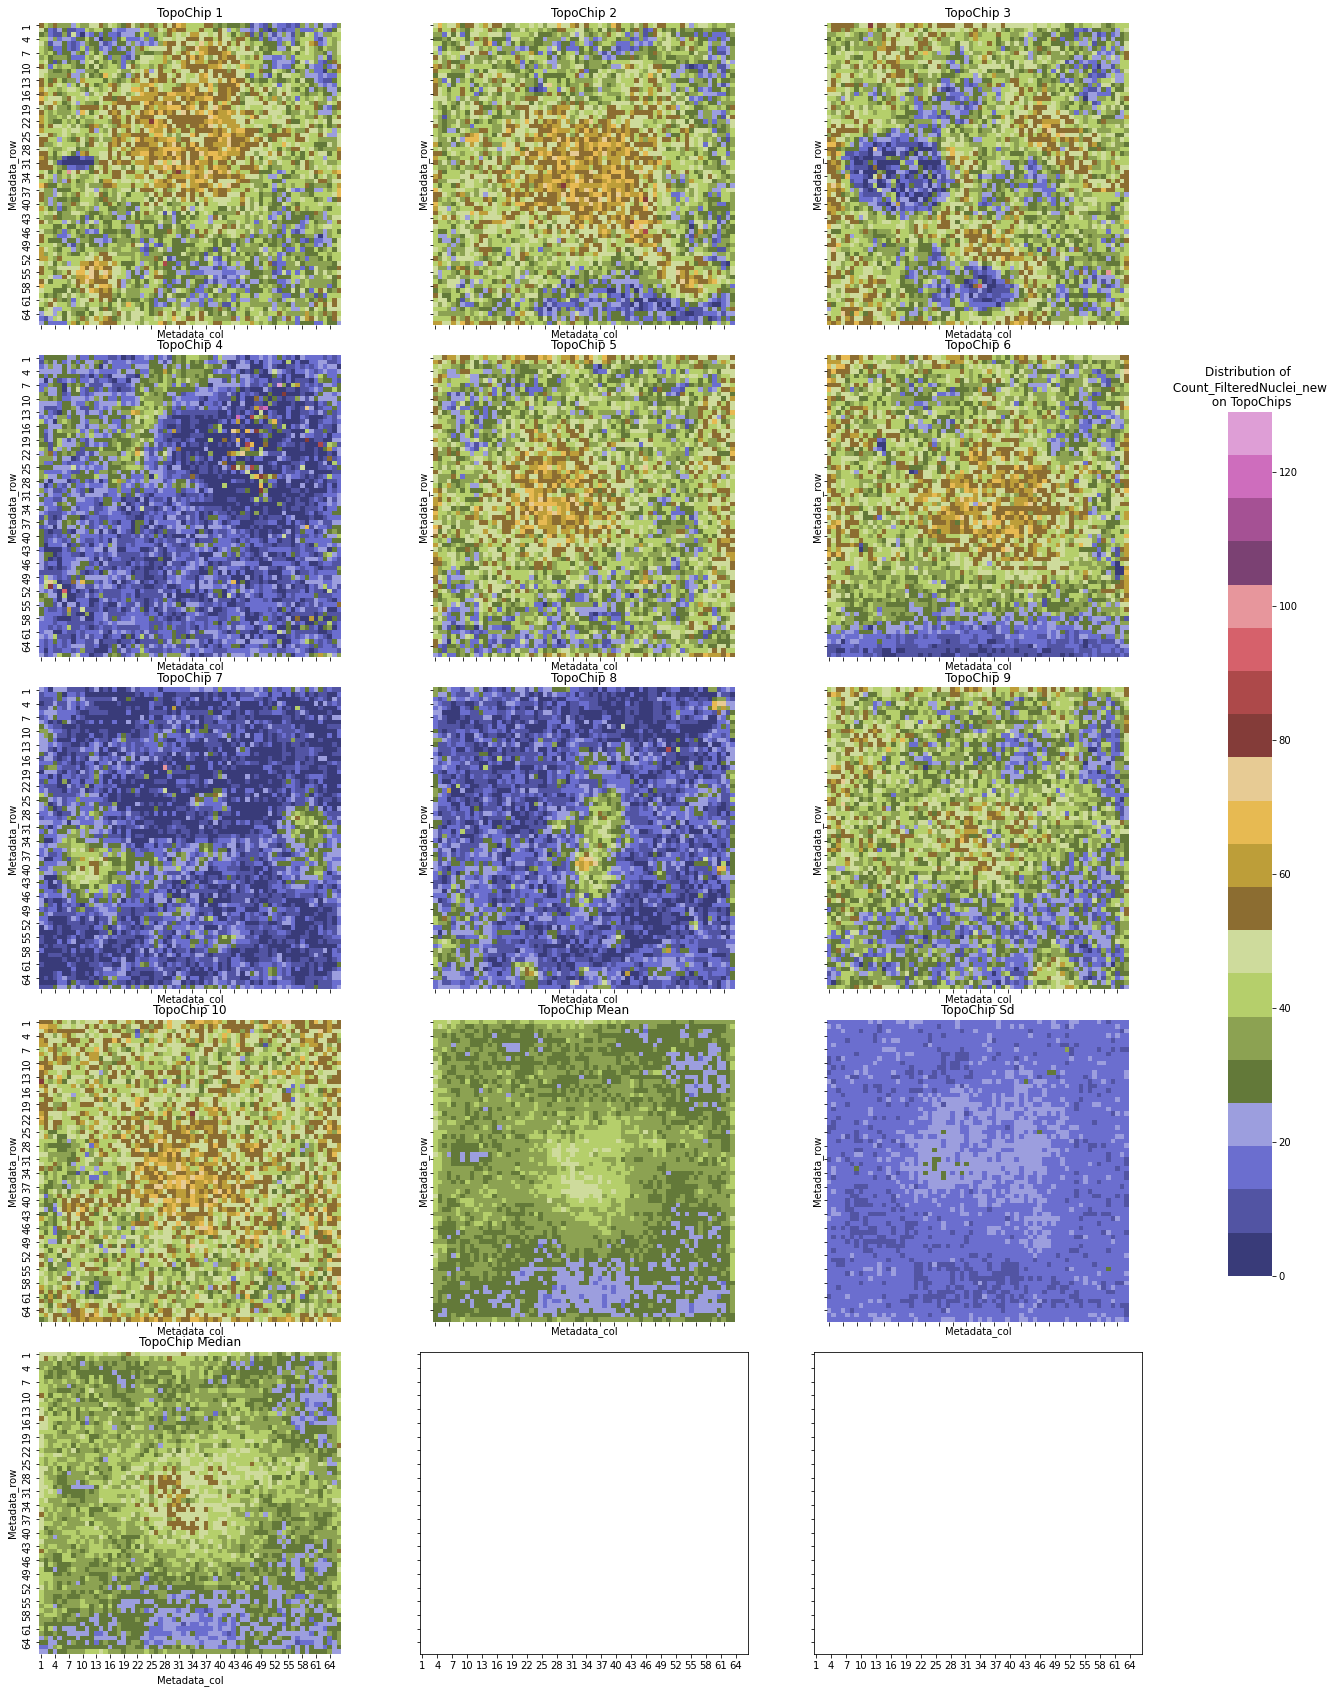

In [12]:
showOnTopoChip(ScreenData=rawImagedataFI,
               displayFeature="Count_FilteredNuclei_new", 
              zoom=[[1,66],[1,66]])

You can zoom in on specific locations on the TopoChip with the zoom argument

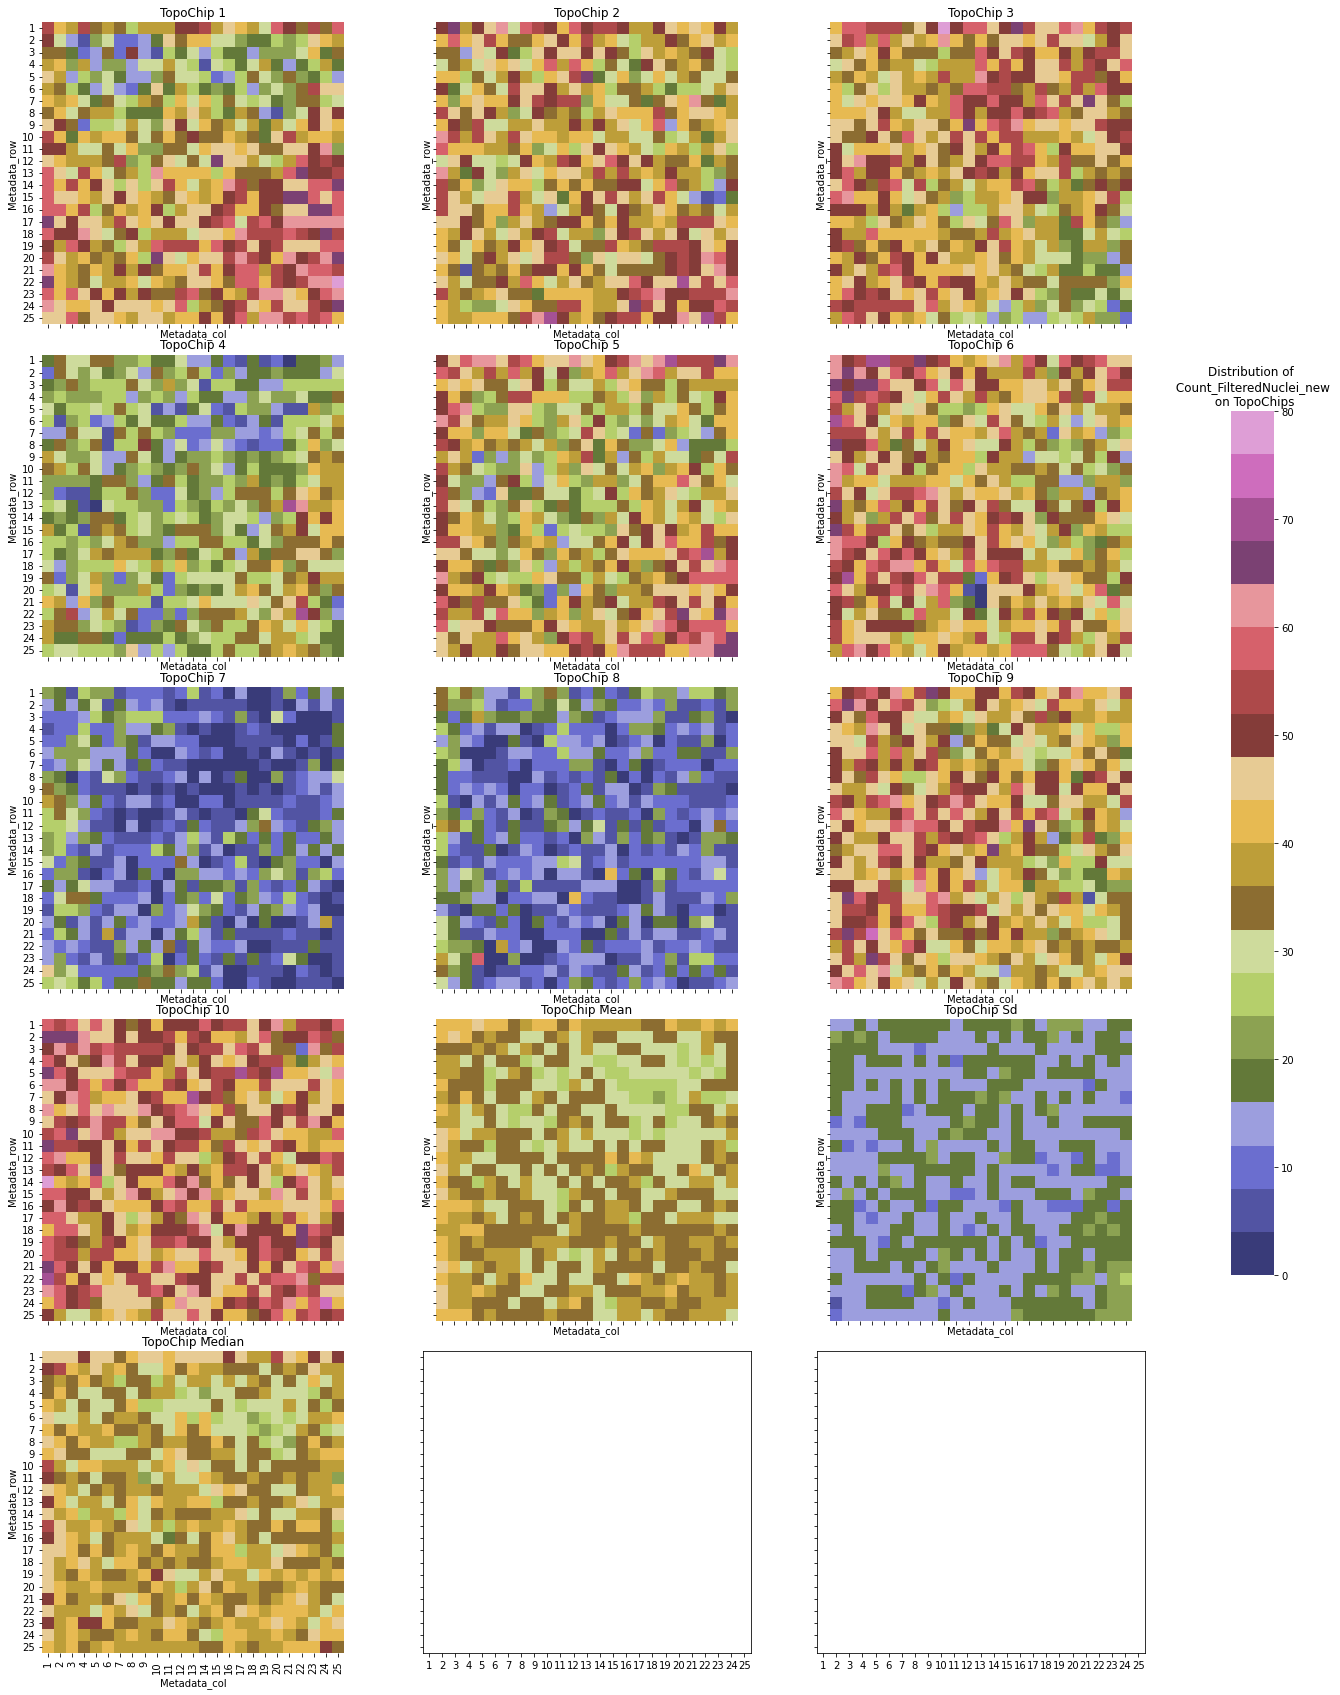

In [16]:
showOnTopoChip(ScreenData=rawImagedataFI,
               displayFeature="Count_FilteredNuclei_new", 
              zoom=[[1,25],[1,25]])

Step 2.2: Display distirbution of the feature of interest with a histogramm per replica, mean, median and SD

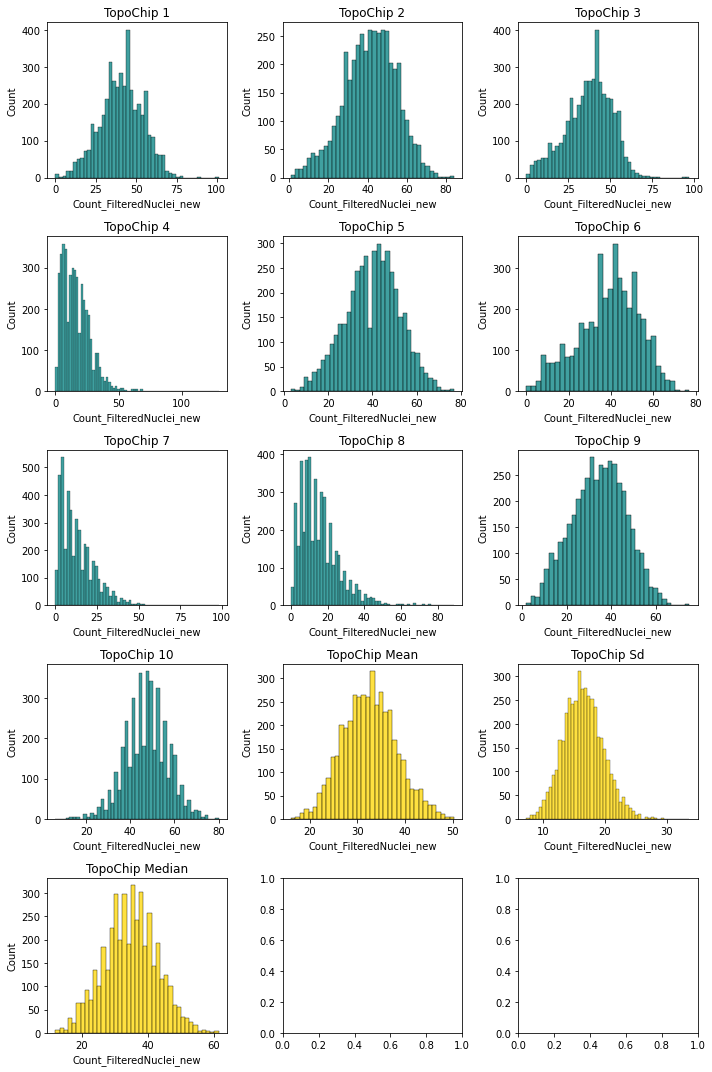

In [7]:
showHistPerTopoChip(ScreenData=rawImagedataFI, 
                    featureOfInterest= "Count_FilteredNuclei_new")

Step 2.3: Explore the raw images for features with certain values

In [8]:
os.getcwd()

'C:\\Users\\20212358\\NK_Marta_podocyte_anaysis'

In [4]:
showImages(ScreenData=rawImagedataFI, 
              featureOfInterest="Count_FilteredNuclei_new", 
              stainingFile="FileName_DNA",
              valuesRange=[1,2],
          mode="overlay",folderNameRaw=PathRawData,folderNameOverlay=PathNameOverlay)

debug: Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages//Chip7// 7
Nephrin_Chip07_Col42_Row14_Seq0900_Mito.tif
Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages//Chip7//


FileNotFoundError: [Errno 2] No such file or directory: 'Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages//Chip7//Nephrin_Chip07_Col42_Row14_Seq0900_Mito.tiff'

<Figure size 1440x5760 with 0 Axes>

#### Step 3: Remove outliers 

##### Step 3.1: Remove outliers based on IQR <br>
<b>Important</b>: FeatureOfInterest determines on which feature the outliers are filtered.

In [7]:
# TO DO: how to avoid typos in the feature of interest?
featureOfInterestByUser="Image_Nuclei_to_Cell_Area_Ratio"   

You have selected Image_Nuclei_to_Cell_Area_Ratio as feature filter


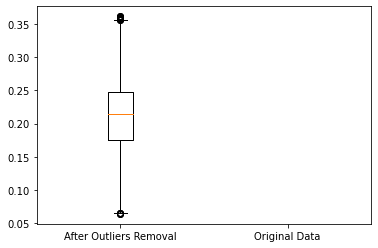

In [8]:
if bool(featureOfInterestByUser):
    print('You have selected %s as feature filter' % featureOfInterestByUser)
    rawImagedataFI_outlierRemoved=removeOutliersWithIQR(ScreenData=rawImagedataFI,featureOfInterest=featureOfInterestByUser,perTopoFeature=False)
else:
    print('Warning, you did not select a feature of interest')

##### Step 3.2: Display results of outlier removal on all the replicas

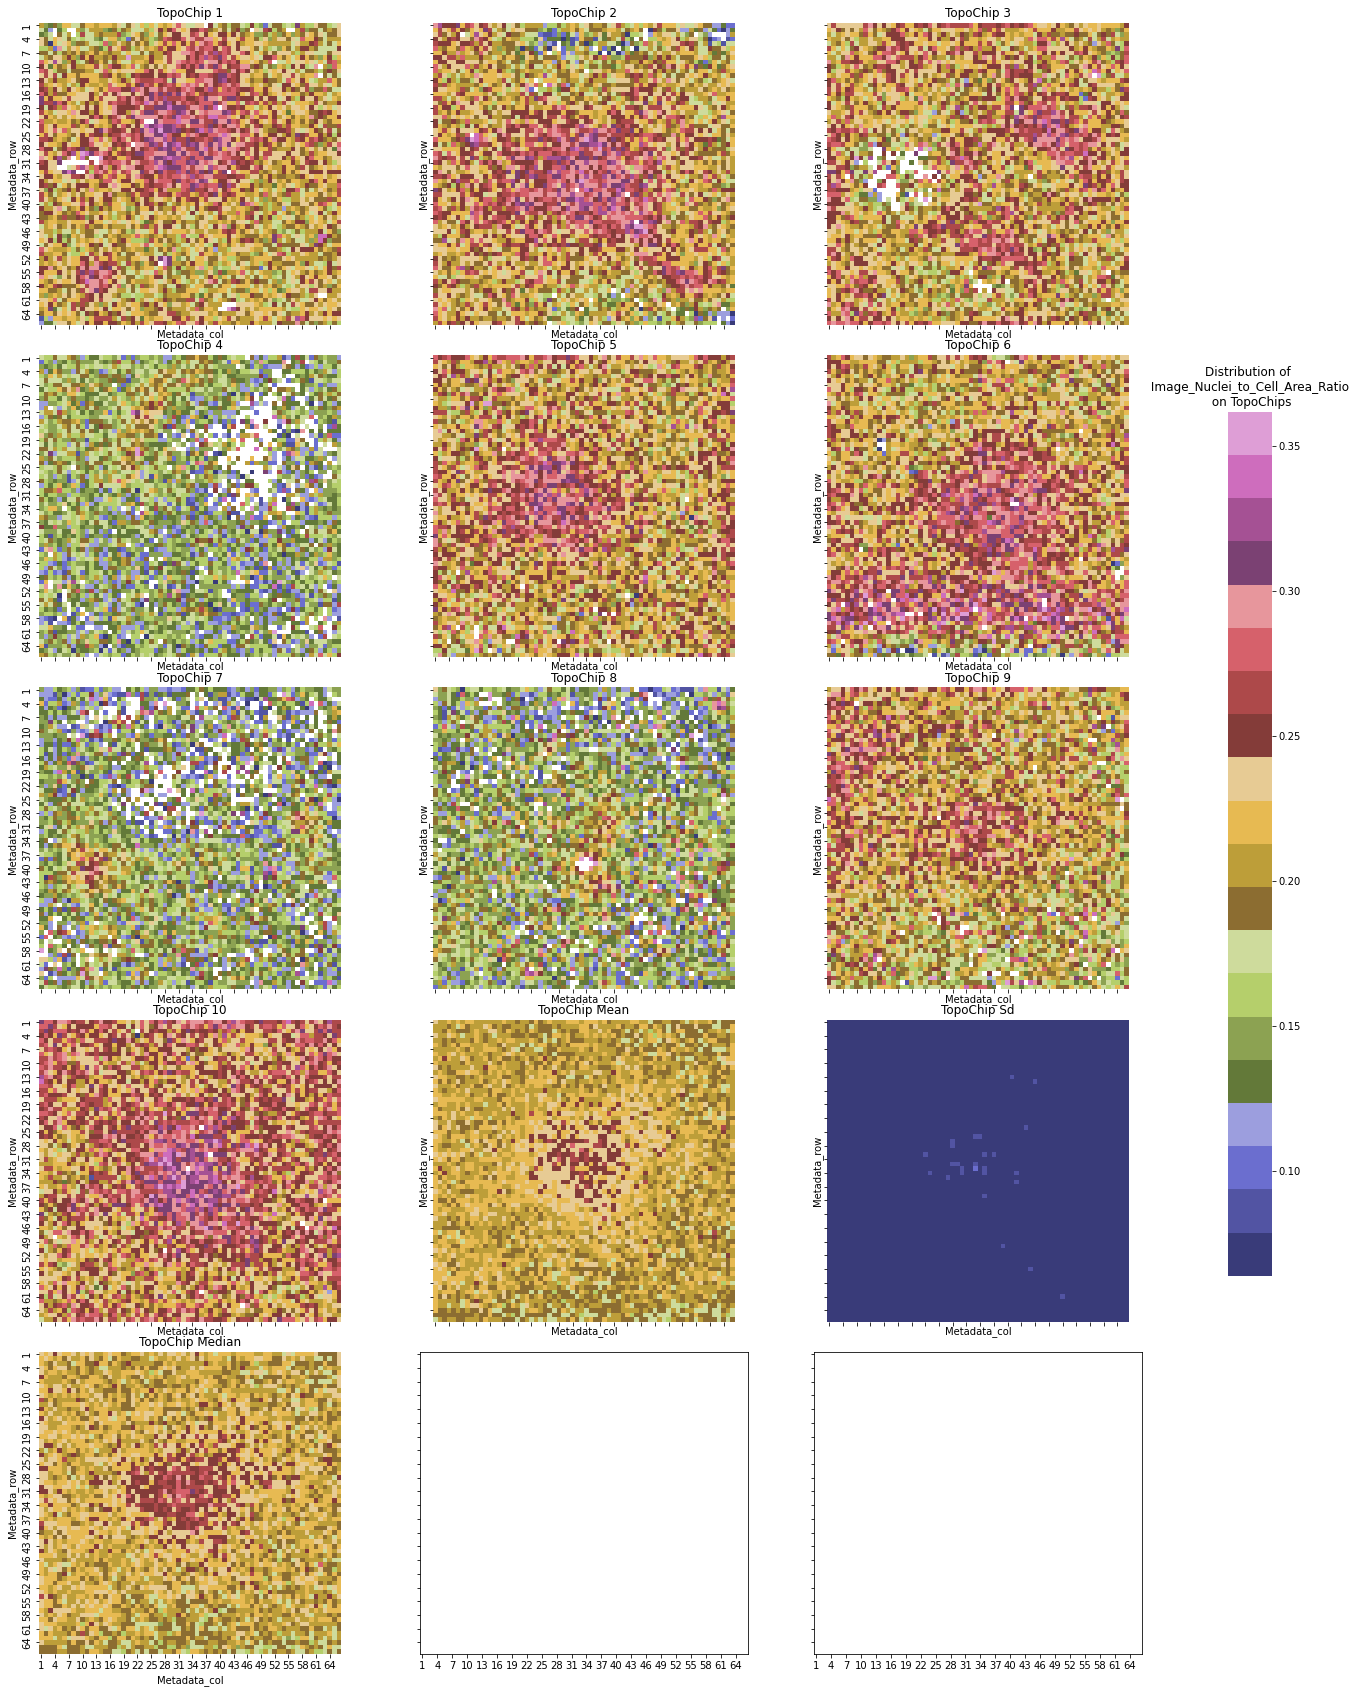

In [9]:
showOnTopoChip(ScreenData=rawImagedataFI_outlierRemoved, 
               displayFeature="Image_Nuclei_to_Cell_Area_Ratio")

##### Step 3.3: Explore the raw images and a feature of interest

In [14]:
### TO ADD: explanation for the staining file
# # FileName_actin is part of the dataframe --> same one containing Count_Cell
# # For the showImages function to work you need to have set the pathRawData and PathNameOverlay
# showImages(ScreenData=rawImagedataFI, 
#               featureOfInterest="Count_CellBody", 
#               stainingFile="FileName_CellBody",
#               valuesRange=[1,2],
#           mode="raw")

In [10]:
rawImagedataFI['FileName_CellBody'].__len__()

43560

#### Step 4: save the new image object

In [11]:
#rawImagedataFI_outlierRemoved.to_csv(os.getcwd()+"/DataAnalysis/imageOutliersRemoved.csv", index=False)
rawImagedataFI_outlierRemoved.to_csv("Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/DataAnalysis/imageOutliersRemoved.csv", index=False)

In [3]:
os.getcwd()

'C:\\Users\\20212358\\NK_Marta_podocyte_anaysis'